## <center> LGMVIP_DS_ September_23_Task_Number_4 <center>
## <center> ML Facial Recognition and Suggest Songs Accordingly <center>
## <center> By K. Pavan Kumar <center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image, ImageEnhance, ImageFilter
import IPython.display as IPdisplay
from collections import Counter
from itertools import chain
import warnings
warnings.filterwarnings('ignore')
import glob
import pathlib
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import shutil
import requests
from io import BytesIO
from PIL import UnidentifiedImageError
from IPython.display import display as ipdisplay, Image as ipimage
from kaggle_secrets import UserSecretsClient
from tensorflow.keras.models import load_model, save_model

In [3]:
source_path='/kaggle/input/fer2013'
destination_path='/kaggle/working/fer2013'

In [4]:
shutil.copytree(source_path,destination_path)

'/kaggle/working/fer2013'

In [5]:
train_path='/kaggle/working/fer2013/train'
test_path='/kaggle/working/fer2013/test'

In [6]:
train_img_path=glob.glob(os.path.join(train_path,"*/*.jpg"))
test_img_path=glob.glob(os.path.join(test_path,"*/*.jpg"))

In [7]:
train_len=len(glob.glob(os.path.join(train_path,"*/*.jpg")))
print('The number of Images in Train Data Set is:',train_len)
test_len=len(glob.glob(os.path.join(test_path,"*/*.jpg")))
print('The number of Images in Train Data Set is:',test_len)

The number of Images in Train Data Set is: 28709
The number of Images in Train Data Set is: 7178


In [8]:
train_angry=len(glob.glob(os.path.join(train_path,'angry/*.jpg')))
train_disgust=len(glob.glob(os.path.join(train_path,'disgust/*.jpg')))
train_fear=len(glob.glob(os.path.join(train_path,'fear/*.jpg')))
train_happy=len(glob.glob(os.path.join(train_path,'happy/*.jpg')))
train_neutral=len(glob.glob(os.path.join(train_path,'neutral/*.jpg')))
train_sad=len(glob.glob(os.path.join(train_path,'sad/*.jpg')))
train_surprise=len(glob.glob(os.path.join(train_path,'surprise/*.jpg')))

Text(0.5, 1.0, 'Countplot of Differnt Emotion Images in Training Dataset')

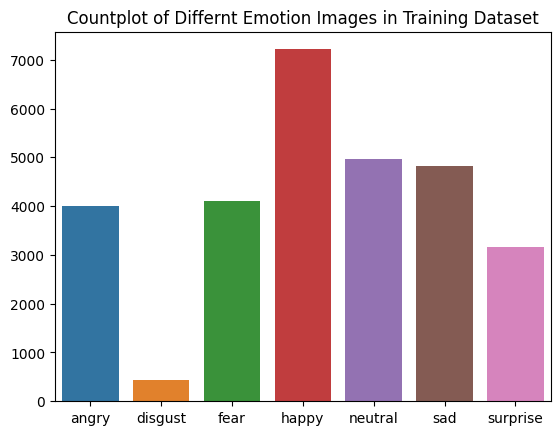

In [9]:
sns.barplot(x=['angry','disgust','fear','happy','neutral','sad','surprise'],
            y=[train_angry,train_disgust,train_fear,train_happy,train_neutral,train_sad,train_surprise])
plt.title('Countplot of Differnt Emotion Images in Training Dataset')

In [10]:
test_angry=len(glob.glob(os.path.join(test_path,'angry/*.jpg')))
test_disgust=len(glob.glob(os.path.join(test_path,'disgust/*.jpg')))
test_fear=len(glob.glob(os.path.join(test_path,'fear/*.jpg')))
test_happy=len(glob.glob(os.path.join(test_path,'happy/*.jpg')))
test_neutral=len(glob.glob(os.path.join(test_path,'neutral/*.jpg')))
test_sad=len(glob.glob(os.path.join(test_path,'sad/*.jpg')))
test_surprise=len(glob.glob(os.path.join(test_path,'surprise/*.jpg')))

Text(0.5, 1.0, 'Countplot of Differnt Emotion Images in Test Dataset')

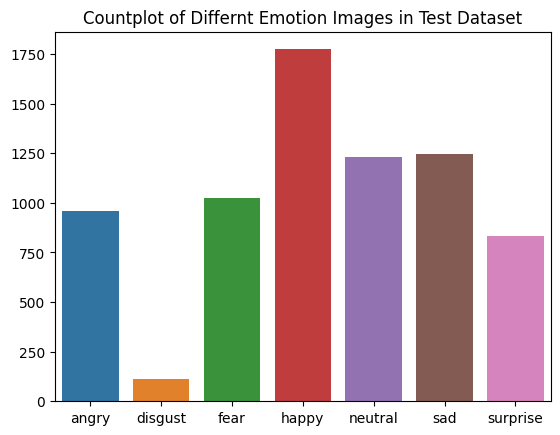

In [11]:
sns.barplot(x=['angry','disgust','fear','happy','neutral','sad','surprise'],
            y=[test_angry,test_disgust,test_fear,test_happy,test_neutral,test_sad,test_surprise])
plt.title('Countplot of Differnt Emotion Images in Test Dataset')

In [12]:
train_images=pd.DataFrame(train_img_path)
train_images.columns=['image_path']

In [13]:
train_images['label']=train_images['image_path'].apply(lambda x:''.join(re.findall(r'/train/(\w+)/',x)))

In [14]:
train_images.head()

,image_path,label
0,/kaggle/working/fer2013/train/surprise/Trainin...,surprise
1,/kaggle/working/fer2013/train/surprise/Trainin...,surprise
2,/kaggle/working/fer2013/train/surprise/Trainin...,surprise
3,/kaggle/working/fer2013/train/surprise/Trainin...,surprise
4,/kaggle/working/fer2013/train/surprise/Trainin...,surprise


In [15]:
train_img_size=[]
for i in range(len(train_images.image_path)):
    train_img_size.append(Image.open(train_images.image_path[i]).size)

In [16]:
print('The Images of size:',Counter(train_img_size))

The Images of size: Counter({(48, 48): 28709})


In [17]:
len(train_images)/32

897.15625

In [18]:
batch_size=64
img_width=48
img_height=48

In [19]:
train_keras_dataset=tf.keras.preprocessing.image_dataset_from_directory(train_path,seed=123,
                                                                       validation_split=0.2,
                                                                       subset='training',
                                                                       image_size=(img_height,img_width),
                                                                       batch_size=batch_size,
                                                                       color_mode='grayscale')

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [20]:
val_keras_dataset=tf.keras.preprocessing.image_dataset_from_directory(train_path,seed=123,
                                                                       validation_split=0.2,
                                                                       subset='validation',
                                                                       image_size=(img_height,img_width),
                                                                       batch_size=batch_size,
                                                                     color_mode='grayscale')

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


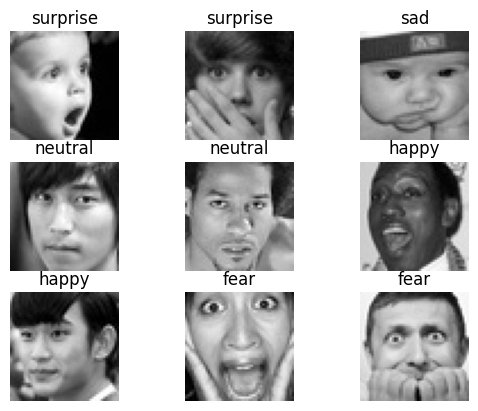

In [21]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Image.open(train_images.image_path[i*3000]),cmap='gray')
    plt.title(train_images.label[i*3000])
    plt.axis('off')

In [22]:
!pip install augmentor

In [23]:
import Augmentor

In [24]:
class_names=list(set(train_images.label))

In [25]:
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.losses import categorical_crossentropy

In [26]:
aug=keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode='horizontal',input_shape=(img_height,img_width,1)),
                      layers.experimental.preprocessing.RandomRotation(0.05,fill_mode='nearest'),
                      layers.experimental.preprocessing.RandomZoom(height_factor=(0.05,0.05),width_factor=(0.05,0.05),fill_mode='nearest')])

In [27]:
model_name='Conv2D'
if not os.path.exists(model_name):
    os.mkdir(model_name)
filepath=model_name+'{epoch:05d}-{val_loss:.5f}.h5'
checkpoint=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,
                           save_weights_only=False,mode='auto',period=1)

In [28]:
model=Sequential(aug)
input_shape=(48,48,1)

In [29]:
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 48, 48, 1)         0         
                                                                 
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                      

In [30]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
epochs=50

In [32]:
history=model.fit(train_keras_dataset,validation_data=val_keras_dataset,epochs=epochs,
                  callbacks=[checkpoint])

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 1.8210 - accuracy: 0.2487
Epoch 1: val_loss improved from inf to 1.79739, saving model to Conv2D00001-1.79739.h5
359/359 [==============================] - 25s 30ms/step - loss: 1.8210 - accuracy: 0.2487 - val_loss: 1.7974 - val_accuracy: 0.2526
Epoch 2/50
357/359 [============================>.] - ETA: 0s - loss: 1.7976 - accuracy: 0.2514
Epoch 2: val_loss improved from 1.79739 to 1.78118, saving model to Conv2D00002-1.78118.h5
359/359 [==============================] - 10s 27ms/step - loss: 1.7975 - accuracy: 0.2513 - val_loss: 1.7812 - val_accuracy: 0.2453
Epoch 3/50
357/359 [============================>.] - ETA: 0s - loss: 1.7821 - accuracy: 0.2538
Epoch 3: val_loss did not improve from 1.78118
359/359 [==============================] - 10s 28ms/step - loss: 1.7824 - accuracy: 0.2536 - val_loss: 1.7918 - val_accuracy: 0.2385
Epoch 4/50
359/359 [==============================] - ETA: 0s - loss: 1.7491 - accuracy:

Text(0.5, 1.0, 'Training Loss and Validation Loss')

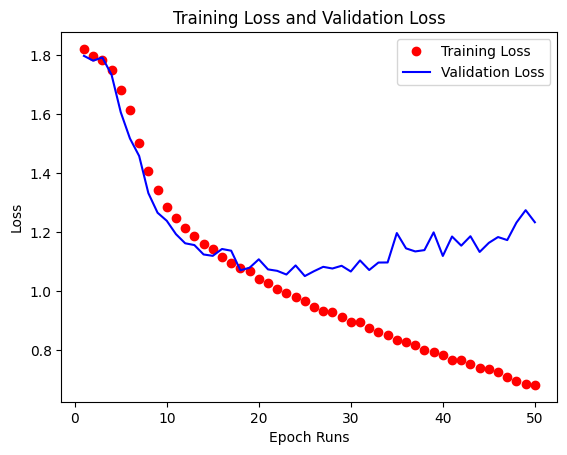

In [33]:
plt.plot(range(1,epochs+1),history.history['loss'],'ro',label='Training Loss')
plt.plot(range(1,epochs+1),history.history['val_loss'],'b',label='Validation Loss')
plt.xlabel('Epoch Runs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss and Validation Loss')

Text(0.5, 1.0, 'Training Accuracy and Validation Accuracy')

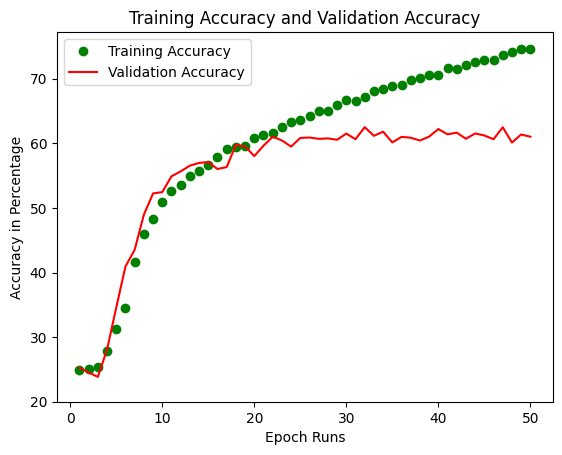

In [34]:
plt.plot(range(1,epochs+1),np.array(history.history['accuracy'])*100,'go',label='Training Accuracy')
plt.plot(range(1,epochs+1),np.array(history.history['val_accuracy'])*100,'r',label='Validation Accuracy')
plt.xlabel('Epoch Runs')
plt.ylabel('Accuracy in Percentage')
plt.yticks(range(20,71,10))
plt.legend()
plt.title('Training Accuracy and Validation Accuracy')

In [56]:
save_model(model,'Conv2D_last_epoch.h5')

In [57]:
conv2dmodel=load_model('/kaggle/working/Conv2D_last_epoch.h5')

In [42]:
from keras.applications import MobileNetV2

In [43]:
mobilenet=MobileNetV2(include_top=False,weights='imagenet',input_shape=(48,48,3))

9406464/9406464 [==============================] - 0s 0us/step


In [44]:
model1=Sequential(aug)

In [45]:
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=input_shape))
model1.add(Conv2D(3,(1,1),padding='same'))
model1.add(mobilenet)
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(7,activation='softmax'))

In [46]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 48, 48, 1)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 3)         6         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)             

In [47]:
model1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model_name1='mobilenet'
if not os.path.exists(model_name1):
    os.mkdir(model_name1)
filepath1=model_name1+'.h5'
checkpoint1=ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True,
                           save_weights_only=True,mode='auto',period=1)

In [49]:
history1=model1.fit(train_keras_dataset,validation_data=val_keras_dataset,epochs=30,
                  callbacks=[checkpoint1])

Epoch 1/30
359/359 [==============================] - ETA: 0s - loss: 1.6220 - accuracy: 0.3777
Epoch 1: val_loss improved from inf to 3.34935, saving model to mobilenet.h5
359/359 [==============================] - 56s 59ms/step - loss: 1.6220 - accuracy: 0.3777 - val_loss: 3.3494 - val_accuracy: 0.3804
Epoch 2/30
359/359 [==============================] - ETA: 0s - loss: 1.3376 - accuracy: 0.4968
Epoch 2: val_loss improved from 3.34935 to 2.74515, saving model to mobilenet.h5
359/359 [==============================] - 19s 52ms/step - loss: 1.3376 - accuracy: 0.4968 - val_loss: 2.7451 - val_accuracy: 0.4031
Epoch 3/30
359/359 [==============================] - ETA: 0s - loss: 1.2407 - accuracy: 0.5319
Epoch 3: val_loss did not improve from 2.74515
359/359 [==============================] - 18s 50ms/step - loss: 1.2407 - accuracy: 0.5319 - val_loss: 3.6418 - val_accuracy: 0.3524
Epoch 4/30
358/359 [============================>.] - ETA: 0s - loss: 1.1876 - accuracy: 0.5483
Epoch 4: val

Text(0.5, 1.0, 'MobileNetV2 Training Loss and Validation Loss')

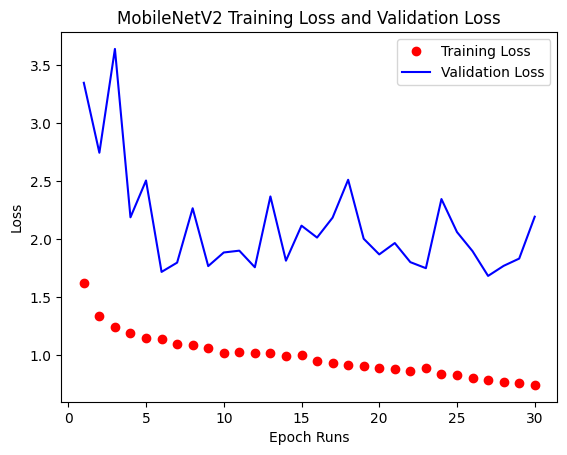

In [50]:
plt.plot(range(1,31),history1.history['loss'],'ro',label='Training Loss')
plt.plot(range(1,31),history1.history['val_loss'],'b',label='Validation Loss')
plt.xlabel('Epoch Runs')
plt.ylabel('Loss')
plt.legend()
plt.title('MobileNetV2 Training Loss and Validation Loss')

Text(0.5, 1.0, 'MobileNetV2 Training Accuracy and Validation Accuracy')

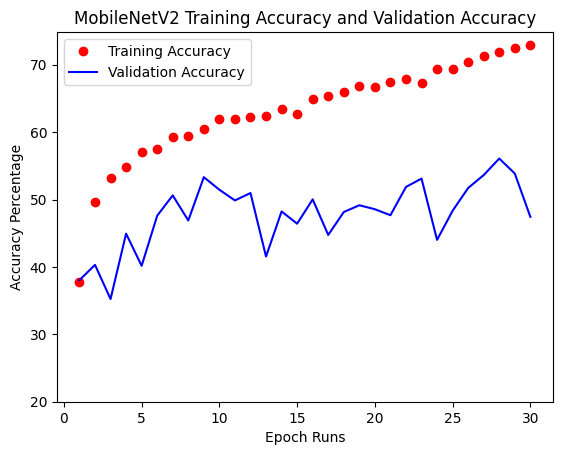

In [51]:
plt.plot(range(1,31),np.array(history1.history['accuracy'])*100,'ro',label='Training Accuracy')
plt.plot(range(1,31),np.array(history1.history['val_accuracy'])*100,'b',label='Validation Accuracy')
plt.xlabel('Epoch Runs')
plt.ylabel('Accuracy Percentage')
plt.yticks(range(20,80,10))
plt.legend()
plt.title('MobileNetV2 Training Accuracy and Validation Accuracy')

In [37]:
true=[]
for images, labels in val_keras_dataset:
    true.extend(labels.numpy())

In [38]:
true_labels=[val_keras_dataset.class_names[i] for i in true]

In [39]:
predicted=np.argmax(model.predict(val_keras_dataset),axis=1)

90/90 [==============================] - 1s 9ms/step


In [41]:
predicted_labels=[val_keras_dataset.class_names[i] for i in predicted]

In [42]:
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'True')

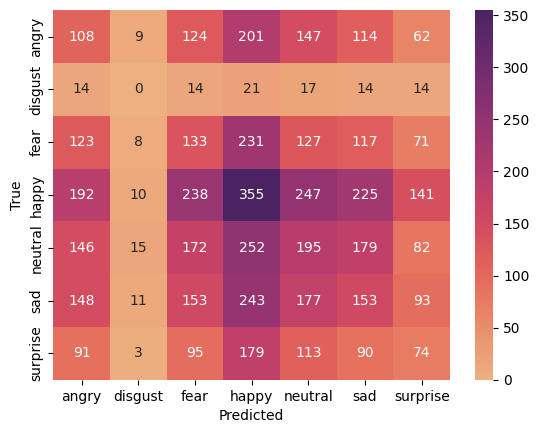

In [43]:
sns.heatmap(confusion_matrix(true_labels,predicted_labels),
            xticklabels=val_keras_dataset.class_names,
           yticklabels=val_keras_dataset.class_names,
           annot=True, cmap='flare',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0.5, 1.0, 'angry')

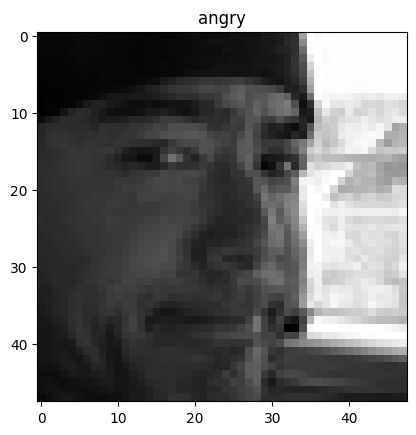

In [111]:
plt.imshow(Image.open(train_images.image_path[24714]),cmap='gray')
plt.title(train_images.label[24714])

In [112]:
def predict_mood(image):
    prediction=np.argmax(conv2dmodel.predict(np.array(Image.open(image))[np.newaxis,...,np.newaxis]/255),axis=1)
    if prediction==0:
        mood='angry'
    elif prediction==1:
        mood='disgust'
    elif prediction==2:
        mood='fear'
    elif prediction==3:
        mood='happy'
    elif prediction==4:
        mood='neutral'
    elif prediction==5:
        mood='sad'
    elif prediction==6:
        mood='surprise'
    return mood

In [113]:
mood=predict_mood(train_images.image_path[24714])
mood

1/1 [==============================] - 0s 21ms/step


'angry'

In [76]:
music=pd.read_csv('/kaggle/input/spotify-music-data-to-identify-the-moods/data_moods.csv')
music.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [77]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [78]:
music.mood.value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [79]:
train_images.label.value_counts()

label
happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
Name: count, dtype: int64

In [80]:
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("lastfmapi")

In [106]:
def recommended_albums(mood):
    if mood in ['fear','disgust','angry']:
        music1=music[music.mood=='Calm']
    elif mood in ['neutral','surprise']:
        music1=music[music.mood=='Energetic']
    elif mood=='sad':
        music1=music[music.mood=='Sad']
    elif mood=='happy':
        music1=music[music.mood=='Happy']
    collage_width=800
    collage_height=800
    collage=Image.new('RGB',(collage_width,collage_height))
    x=0
    y=0
    for artist_name, albumname in zip(music1.artist[0:40], music1.album[0:40]):
        album_url=None
        response=None
        album=requests.get(
        f'http://ws.audioscrobbler.com/2.0/?method=album.getinfo&api_key={api_key}&artist={artist_name}&album={albumname}&format=json').json()
        if 'album' in album and 'image' in album['album']:
            album_url=album['album']['image'][-1]['#text']
        try:
            if album_url:
                response=requests.get(album_url)
            if response is not None and response.status_code==200:
                album_cover=Image.open(BytesIO(response.content))
                album_cover=album_cover.resize((200,200))
                collage.paste(album_cover,(x,y))
                x+=200
                if x>= collage_width:
                    x=0
                    y+=200
        except UnidentifiedImageError:
            print('Skip Album')
    return collage

In [114]:
recommended_albums_list=recommended_albums(mood)

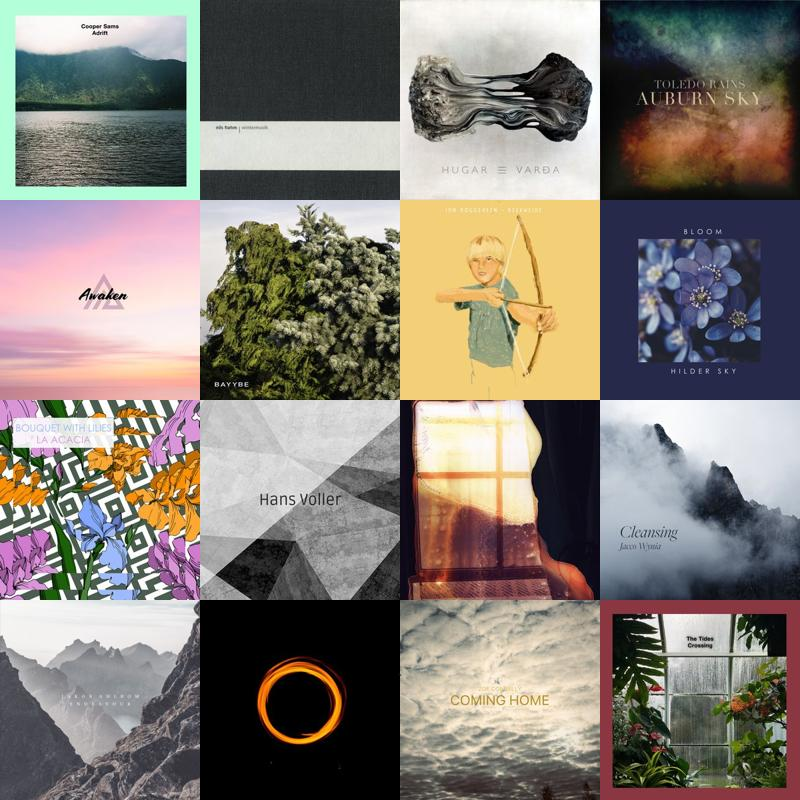

In [115]:
recommended_albums_list.save('recommended_albums_list.jpg')
ipdisplay(ipimage(filename='recommended_albums_list.jpg'))